## 공공데이터를 이용한 카페 상권분석(2022 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 

## 0. Data Description

- 소상공인 상권 데이터를 국내에 있는 모든 소상공인으로 등록된 점포들에 대한 정보를 제공합니다.

[데이터] https://www.data.go.kr/data/15083033/fileData.do

In [1]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import os

### 1. 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
base_path = "/content/drive/MyDrive/Colab Notebooks/data/소상공인시장진흥공단_상가(상권)정보_20211231/"
seoul = pd.read_csv(base_path + "소상공인시장진흥공단_상가(상권)정보_서울_202112.csv")
seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315289,17915026,사라헤어하우스,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,1162010100108610014026971,NaN,서울특별시 관악구 관악로 185,151811,8758.0,NaN,3,NaN,126.952644,37.481784
315290,17917525,김현진153필라테스,NaN,N,관광/여가/오락,N05,요가/단전/마사지,N05A01,요가/단식,S96129,...,1174010900100510007009699,남해빌딩,서울특별시 강동구 양재대로 1517,134862,5316.0,NaN,1,NaN,127.140855,37.541259
315291,17913544,26도헤어마곡나루역점,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,1150010500107590001000001,두산더랜드타워,서울특별시 강서구 마곡서로 152,157805,7788.0,306,NaN,NaN,126.825623,37.567747
315292,17958597,명품케터링,NaN,Q,음식,Q13,음식배달서비스,Q13A03,음식출장조달,I56131,...,1130510100113570000035071,삼각산아이원아파트,서울특별시 강북구 삼양로19길 113,142718,1198.0,120,NaN,NaN,127.017829,37.617041


In [6]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
file_names = glob(base_path + "*.csv") # csv 확장자를 가지는 모든 파일 이름.

# csv 목록 불러오기

# 모든 csv 병합하기
total_df = pd.DataFrame()

for file_name in file_names:
  temp_df = pd.read_csv(file_name)
  total_df = pd.concat([total_df, temp_df])

# reset index
total_df = total_df.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
#total_df.상권업종중분류명.unique() --> "커피점/카페"
# "상호명"
# "시도명"
total_df.시도명.unique()

array(['부산광역시', '울산광역시', '세종특별자치시', '인천광역시', '충청남도', '충청북도', '전라북도',
       '광주광역시', '대구광역시', '제주특별자치도', '경상남도', '경상북도', '대전광역시', '서울특별시',
       '전라남도', '강원도', '경기도'], dtype=object)

In [13]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
total_df.columns#head(10) # ["상권업종중분류명", "상호명", "시도명"]

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190348 entries, 0 to 2190347
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      float64
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 

In [17]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
temp_df = total_df[["상권업종중분류명", "상호명", "시도명"]]
del total_df

### 2. 데이터 구경하기

In [18]:
temp_df

,상권업종중분류명,상호명,시도명
0,모텔/여관/여인숙,미광장,부산광역시
1,닭/오리요리,BHC치킨,부산광역시
2,의복의류,스텔라,부산광역시
3,한식,도란도란,부산광역시
4,사진,럭키사진관,부산광역시
...,...,...,...
2190343,자동차/이륜차,세이브출장세차,경기도
2190344,종합소매점,반값마트,경기도
2190345,분식,평택분식,경기도
2190346,한식,식사준비안산초지역점,경기도


#### 전국 커피 전문점 

In [21]:
# 카페만 뽑아냅니다.
df_coffee = temp_df.loc[temp_df.상권업종중분류명 == "커피점/카페", :].reset_index(drop=True)
# index를 다시 세팅합니다.
del temp_df
print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee

전국 커피 전문점 점포 수 :  101346


,상권업종중분류명,상호명,시도명
0,커피점/카페,투썸플레이스,부산광역시
1,커피점/카페,더리터,부산광역시
2,커피점/카페,비움카페,부산광역시
3,커피점/카페,로카페,부산광역시
4,커피점/카페,콩카페,부산광역시
...,...,...,...
101341,커피점/카페,베터비버터,경기도
101342,커피점/카페,카페,경기도
101343,커피점/카페,에그까페24,경기도
101344,커피점/카페,금커피별빙수,경기도


#### 서울내 커피 전문점 

In [22]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = df_coffee.loc[df_coffee.시도명 == "서울특별시", :]
df_seoul_coffee.index = range(len(df_seoul_coffee)) # reset_index와 같은 효과.
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee

서울시 내 커피 전문점 점포 수 : 18628


,상권업종중분류명,상호명,시도명
0,커피점/카페,커피빈,서울특별시
1,커피점/카페,요거프레소,서울특별시
2,커피점/카페,우성커피숍,서울특별시
3,커피점/카페,버블베어,서울특별시
4,커피점/카페,알뤼르,서울특별시
...,...,...,...
18623,커피점/카페,매머드익스프레스,서울특별시
18624,커피점/카페,카페,서울특별시
18625,커피점/카페,메가엠지씨커피마곡유림,서울특별시
18626,커피점/카페,이알로스터즈/ERroasters,서울특별시


#### 전국 스타벅스

In [24]:
#df_coffee.상호명.unique()[:100]

array(['투썸플레이스', '더리터', '비움카페', '로카페', '콩카페', '빽다방', '이디야커피', '카페황금나무',
       '꼬마대통령', '도타이', '카페휴', '수연다방', '단디코카', '토스피아', '오랜지바다', '충원커피숍',
       '이삭토스트', '수명', '용커피숍', '엔케이이뮨베이커리카페', '길커피', '커피앤유', '아슬란',
       '엔제리너스', '모네의정원', '닥밭골북카페', '컴파스커피', '아이브', '엔제리너스가덕휴게소점',
       '아이엠PC카페', '더셰프', '케익타운', '우인', '원일커피숍', '오늘도커피볶는집', '북마니아',
       '영커피숍', '이디아커피', '조이커피전문점', '스타벅스', '엘리온카페', '시나본', '커피베이',
       '뉘앙스사주카페', '카페301', 'caffe그루', '만랩커피', '엔제리너스부산청사포점', '모모스커피',
       '커피트리니티', '프레임', '공항더치커피', '달콤', '카페에비아케', '로타리다방', '핸드케이크',
       '가배도피오', '라떼떼', '컴포즈커피', '탐앤탐스', '카페연', '경성팥집옥루몽', '뜰에', '커피앤스톤',
       '대평동마을회대평마을다방', '노스커피', '카페보니타', '동구네PC카페', '커피구루마', '빈스에스프레소',
       '공간,성', '가베향', 'CAFFEMISO', '위드커피', '커피2층', '가온사무편의점', '빈스빈스',
       '블랙코끼리', '커피&현', '카페제니아', '아트인오리', 'Dichten', '북카페', '풀하우스',
       '카페두오모', '시스템', '할리스커피', '카페두다트', '위크;휴', '남도커피숍', '칼리버', '장안상회',
       '광안리게스후점', '채스갤러리카페', '초코카페', '슈거문', '카페콘텐토', '카페토끼풀', '커피마실',
       '프리미엄학습관'], dtype=

In [25]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = df_coffee[df_coffee.상호명.str.contains("스타벅스")]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks

전국 스타벅스 점포 수 : 1503


,상권업종중분류명,상호명,시도명
0,커피점/카페,스타벅스,부산광역시
1,커피점/카페,스타벅스,부산광역시
2,커피점/카페,스타벅스,부산광역시
3,커피점/카페,스타벅스,부산광역시
4,커피점/카페,스타벅스서면NC점,부산광역시
...,...,...,...
1498,커피점/카페,스타벅스,경기도
1499,커피점/카페,스타벅스,경기도
1500,커피점/카페,스타벅스,경기도
1501,커피점/카페,스타벅스,경기도


#### 서울 스타벅스

In [28]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = df_starbucks.loc[df_starbucks.시도명 == "서울특별시", :]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks

서울시 내 스타벅스 점포 수 : 467


,상권업종중분류명,상호명,시도명
0,커피점/카페,스타벅스,서울특별시
1,커피점/카페,스타벅스남부터미널2점,서울특별시
2,커피점/카페,스타벅스,서울특별시
3,커피점/카페,스타벅스미아사거리역점,서울특별시
4,커피점/카페,스타벅스,서울특별시
...,...,...,...
462,커피점/카페,스타벅스,서울특별시
463,커피점/카페,스타벅스,서울특별시
464,커피점/카페,스타벅스,서울특별시
465,커피점/카페,스타벅스,서울특별시


#### 전국 이디야

In [29]:
df_ediya = df_coffee[df_coffee.상호명.str.contains("이디야")]
df_ediya.index = range(len(df_ediya))
print('전국 이디야 점포 수 :', len(df_ediya))
df_ediya

전국 이디야 점포 수 : 2065


,상권업종중분류명,상호명,시도명
0,커피점/카페,이디야커피,부산광역시
1,커피점/카페,이디야커피,부산광역시
2,커피점/카페,이디야커피,부산광역시
3,커피점/카페,이디야커피,부산광역시
4,커피점/카페,이디야커피수영현대점,부산광역시
...,...,...,...
2060,커피점/카페,이디야커피,경기도
2061,커피점/카페,이디야커피,경기도
2062,커피점/카페,이디야커피,경기도
2063,커피점/카페,이디야커피,경기도


#### 서울 이디야

In [30]:
df_seoul_ediya = df_ediya.loc[df_ediya.시도명 == "서울특별시", :]
df_seoul_ediya.index = range(len(df_seoul_ediya))
print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya

서울시 내 이디야 점포 수 : 412


,상권업종중분류명,상호명,시도명
0,커피점/카페,이디야커피,서울특별시
1,커피점/카페,이디야커피,서울특별시
2,커피점/카페,이디야커피양재AT점,서울특별시
3,커피점/카페,이디야커피,서울특별시
4,커피점/카페,이디야커피,서울특별시
...,...,...,...
407,커피점/카페,이디야커피,서울특별시
408,커피점/카페,이디야커피,서울특별시
409,커피점/카페,이디야커피,서울특별시
410,커피점/카페,이디야커피,서울특별시


#### 전국 투썸 

In [31]:
df_2some = df_coffee[df_coffee.상호명.str.contains("투썸")]
df_2some.index = range(len(df_2some))
print('전국 투썸플레이스 점포 수 :', len(df_2some))
df_2some

전국 투썸플레이스 점포 수 : 1038


,상권업종중분류명,상호명,시도명
0,커피점/카페,투썸플레이스,부산광역시
1,커피점/카페,투썸플레이스,부산광역시
2,커피점/카페,투썸플레이스,부산광역시
3,커피점/카페,투썸플레이스,부산광역시
4,커피점/카페,투썸플레이스부산센텀CGV점,부산광역시
...,...,...,...
1033,커피점/카페,투썸플레이스,경기도
1034,커피점/카페,투썸플레이스,경기도
1035,커피점/카페,투썸플레이스,경기도
1036,커피점/카페,투썸플레이스,경기도


#### 서울 투썸 

In [32]:
df_seoul_2some = df_2some.loc[df_2some.시도명 == "서울특별시", :]
df_seoul_2some.index = range(len(df_seoul_2some))
print('서울시 내 투썸플레이스 점포 수 :', len(df_seoul_2some))
df_seoul_2some

서울시 내 투썸플레이스 점포 수 : 241


,상권업종중분류명,상호명,시도명
0,커피점/카페,투썸플레이스서울대역중앙점,서울특별시
1,커피점/카페,투썸플레이스,서울특별시
2,커피점/카페,투썸플레이스,서울특별시
3,커피점/카페,투썸플레이스,서울특별시
4,커피점/카페,투썸플레이스,서울특별시
...,...,...,...
236,커피점/카페,투썸플레이스,서울특별시
237,커피점/카페,투썸플레이스,서울특별시
238,커피점/카페,투썸플레이스,서울특별시
239,커피점/카페,투썸플레이스,서울특별시


### 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**변수**

- 전체 점포 : temp_df
- 전체/서울 커피전문점 : df_coffee / df_seoul_coffee



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- (optional) 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek

#### 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [38]:
print("**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****")
major_cafe_rate = (len(df_starbucks) + len(df_ediya) + len(df_2some)) / len(df_coffee)
print("%.2f%%" % (major_cafe_rate * 100))

**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****
4.54%


#### 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [40]:
print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_seoul_coffee) * 100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_seoul_coffee) * 100))

스타벅스 : 2.507%
이디야 : 2.212%
투썸플레이스 : 1.294%


#### 각 커피브랜드별 서울 입점 비율 

In [41]:
print("**** 주요 커피브랜드별 서울 입점 비율 ****")

print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_starbucks) * 100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_ediya) * 100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_2some) * 100))

**** 주요 커피브랜드별 서울 입점 비율 ****
스타벅스 : 31.071%
이디야 : 19.952%
투썸플레이스 : 23.218%


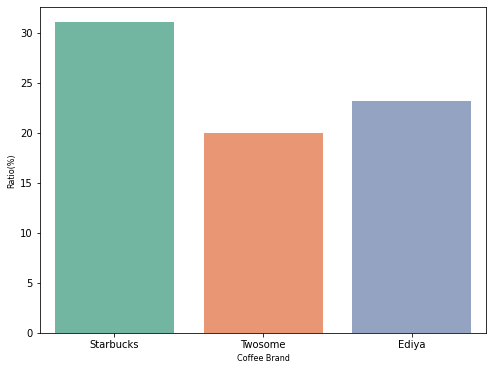

In [52]:
# 주요 3대 커피브랜드 서울 입점 비율을 시각화합니다.
top3_cafe = pd.DataFrame({"Coffee_Brand" : ["Starbucks", "Twosome", "Ediya"],
                          "Ratio(%)": [31.071, 19.952, 23.218]})
#top3_cafe
plt.figure(figsize=(8, 6))
#sns.barplot(data=top3_cafe, x="Coffee_Brand", y="Ratio(%)", palette="Set2")
plt.xlabel("Coffee Brand", fontsize=8)
plt.ylabel("Ratio(%)", fontsize=8)
sns.barplot(x=["Starbucks", "Twosome", "Ediya"], y=[31.071, 19.952, 23.218], palette="Set2")
plt.show()